In [1]:
#%pip install yfinance 
#%pip install plotly
#%pip install nbformat

In [2]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as pdr 

import yfinance as yf

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
import plotly.graph_objs as go

In [12]:
msft = yf.Ticker("msft")

In [13]:
stock_info = msft.info
df = msft.history(period='1y')

In [14]:
display(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-08 00:00:00-05:00,358.985415,361.159102,357.863829,360.494110,26767800,0.0,0.0
2023-11-09 00:00:00-05:00,359.600798,362.072268,357.675249,358.002808,24847300,0.0,0.0
2023-11-10 00:00:00-05:00,358.796843,367.342713,358.379989,366.915924,28042100,0.0,0.0
2023-11-13 00:00:00-05:00,365.476716,365.724854,363.173993,363.948181,19986500,0.0,0.0
2023-11-14 00:00:00-05:00,368.245921,369.178920,364.613185,367.511414,27683900,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-01 00:00:00-04:00,409.010010,415.500000,407.500000,410.369995,24230400,0.0,0.0
2024-11-04 00:00:00-05:00,409.799988,410.420013,405.570007,408.459991,19672300,0.0,0.0
2024-11-05 00:00:00-05:00,408.369995,414.899994,408.079987,411.459991,17626000,0.0,0.0


In [15]:
data = df["Close"]

In [16]:
print(data.shape)

(252,)


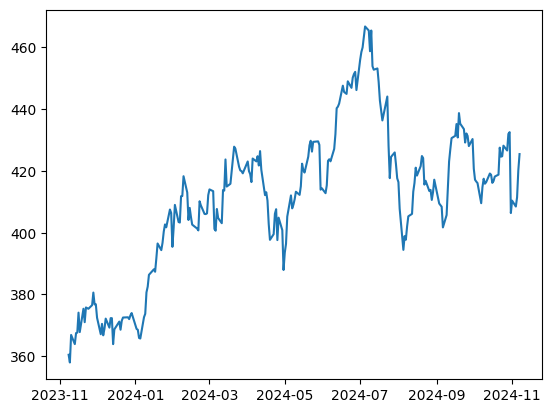

In [17]:
plt.figure()
plt.plot(df["Close"])
plt.show()

In [ ]:
"""stock_info = msft.info

for key, value in stock_info.items():
    print(key, ":" , value)"""

#print(msft.recommendations)
#print(msft.major_holders)
#print(msft.institutional_holders)

Testting the algorithm

In [18]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy import linalg

import pandas as pd
import pandas_datareader.data as web

In [19]:
d=2
M=150

# Matrix with ones on the lower side diagonal (starting from position 2)
def nilpotent(M):
    B = np.zeros((M,M))
    for i in range(2,M):
        B[i,i-1]=1.0
    return B

# Vectors e_i
def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

In [20]:
def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        B = 0.0*nilpotent(M) + np.random.normal(0.0,0.03,size=(M,M))
        B = np.random.permutation(B)
        A = A + [B]
        beta = beta + [0.0*canonical(i,M)+np.random.normal(0.0,0.03,size=(M,1))]
    return [A,beta]

In [21]:
Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]

def sigmoid(x):
    return np.tanh(x)

# Reservoirfield approximates a vector field 
def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

In [22]:
lrets = np.log(data/data.shift(1)).dropna()

In [24]:
"""
The code calculates the rolling covariance matrix over a 30-period window for the dataset lrets and then removes any NaN values that might 
appear (usually at the start or end of the rolling window). The result is stored in the variable Omega.
This operation is commonly used in financial data analysis to calculate dynamic relationships between multiple time series, 
such as stock returns, over a moving window.
"""

Omega = (lrets
         .rolling(30)
         .cov()
         .dropna())

In [25]:
print(Omega.loc['2023-12-21 00:00:00-05:00'])

0.0001349976306904728


In [26]:
dates = lrets.index
dates = dates[30:]

In [27]:
covdata = dict(zip(dates, [Omega.loc[date] for date in dates]))

In [28]:
marketBM = dict(zip(dates, [1/(np.sqrt(Omega.loc[date]))*lrets.loc[date] for date in dates]))

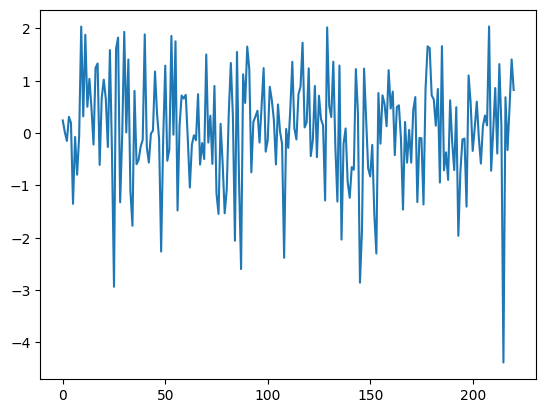

1.0275535009214034
0.06302490067142208


In [29]:
plt.plot([marketBM[date] for date in dates])
plt.show()
print(np.std(np.array([marketBM[date] for date in dates])))
print(np.mean(np.array([marketBM[date] for date in dates])))

In [30]:
for l in dates:
    print(marketBM[l])

0.24123104989600544
0.020049134851243645
-0.14955298906477973
0.3101506178496298
0.19422864112638222
-1.3527716089042015
-0.07468886151081675
-0.7960212750579252
-0.058583841723526285
2.035593193861965
0.3185878530503533
1.8793537937054638
0.5031294059125951
1.0356137000490007
0.4807381127563642
-0.21980302610028957
1.2463701606313458
1.329767917850366
-0.6082395885772143
0.6725967450912426
1.0212897050508705
0.6542619201067501
-0.2661091552425434
1.5857211383630336
-0.3617899378757119
-2.937012538562153
1.6127627994085065
1.8250936441920647
-1.3235912736359248
-0.0383884182088525
1.9341074705773422
0.013411646428435887
1.4054499466913566
-1.111449097827367
-1.7723503210946263
0.8056072253841481
-0.5947630339368956
-0.5121156339567123
-0.2605638076908656
-0.1290924303792558
1.8855832778551198
-0.264608743825773
-0.5634479474603117
-0.012198540423341387
0.048855908929903956
1.1760979103917926
0.36943004764734666
-0.11639991663128059
-2.2644825225616043
-0.10527419289368468
1.28822031358

In [31]:

BMmarketpath = 1/250*np.ones((len(dates)))
mean = np.mean([marketBM[l] for l in dates])

In [32]:
print(BMmarketpath)

[0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.

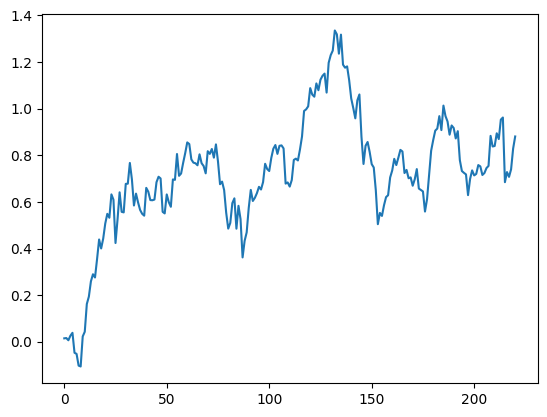

In [33]:
BMmarketpath = np.cumsum([np.sqrt(1/250)*(marketBM[date]-0.*mean)
                                                   for date in dates])
#BMmarketpath[:,K]= np.cumsum(BMmarketpath[:,K])
plt.plot(BMmarketpath)
plt.show()

In [ ]:
print(BMmarketpath)

In [ ]:
from sklearn import linear_model
import pandas as pd
lm = linear_model.Ridge(alpha=0.05)#
model = lm.fit(Xtrain,Ytrain)
plt.plot(model.predict(Xtrain),'r')
plt.plot(Ytrain,'b')
plt.show()
model.score(Xtrain,Ytrain)
model.coef_